# On machine learning
## Lingo: 
### Feature: synonym with variable, column, attribute, and field
### Instance: synonym with row, observation, data point, value and case
### Target: synonym with predictant and dependent variable
### Data: synonym with predictor or set of predictor variables

### Data is usually broken into sample(check how well a model performs) and training sets(2/3 of data set)

## Supervised vs Unsupervised
### Supervised: Make predictions from labeled data (ex email spam filter)
### Unsupervised: Make predictions from unlabeled data (ex house pricing based of old historical data)

## Factor Analysis
### not really machine learning but a good segway
### explores data sets to find root causes that explain why certain data behaves in a particular manner
### Factors (latent variables): variables that are quite meaningful but are inferred and not directly observable
### Assumptions: features are metric, continuous or ordinal, r > 0,3, > 100 observations and > 5 observations per feature, sample is homogenous


## Explanatory factor analysis
### the iris data set:
### Iris Flowers are labels:
### -Setosa
### -Versicolor
### -Virginica
### The Attributes (predictive features):
### -sepal length
### -sepal width
### -petal length
### -petal width
### The numerical attributes are sepal and petal length and width 

In [1]:
import numpy as np
import pandas as pd

import sklearn
from sklearn.decomposition import FactorAnalysis

from sklearn import datasets

In [10]:
#loading the iris dataset
iris = datasets.load_iris()

X, y = iris.data, iris.target

variable_names = iris.feature_names

X[0:10,]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1]])

### Next we will instantiate a factor analysis object and find the latent variables by calling the fit method on the dataset

In [13]:
factor = FactorAnalysis().fit(X)

pd.DataFrame(factor.components_, columns = variable_names)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,0.706989,-0.158005,1.654236,0.70085
1,0.115161,0.159635,-0.044321,-0.01403
2,-0.000000,0.000000,0.000000,0.00000
3,-0.000000,0.000000,0.000000,-0.00000


## For factor analysis a positive number indicates that a positive proportion exists between each factor and a feature, a negative factor means they diverge

## SVD singular value decomposition 
### Linear algebra method that decomposes a matrix into 3 resultant matrices to reduce information redundacy and noise
### Most commonly used for principal component analysis 
### PCA is a unsupervised ML algo, discovers relatioships between uncorrelated features that embody datasets important information (variance) with the redundancy, noise and outliers stripped out


### Using factors and components
### both represent what is left of a dataset after information redundancy and noise is stripped out
### you can use them as input variables for machine learning algos to generate predictions from these compressed representations of your data

In [7]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import pylab as plt
import seaborn as sb
from IPython.display import Image
from IPython.core.display import HTML
from pylab import rcParams

import sklearn
from sklearn import decomposition
from sklearn.decomposition import PCA
from sklearn import datasets

In [8]:
%matplotlib inline
rcParams['figure.figsize'] = 5, 4
sb.set_style('whitegrid')

In [9]:
iris = datasets.load_iris()

X = iris.data

variable_names = iris.feature_names

X[0:10,]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1]])

In [11]:
#instantiate PCA object using fit method
pca = decomposition.PCA()

iris_pca = pca.fit_transform(X)

pca.explained_variance_ratio_

array([0.92461872, 0.05306648, 0.01710261, 0.00521218])

In [12]:
pca.explained_variance_ratio_.sum()

1.0

## Deciding what components to keep
### the explained variance ratio tells us how much information is compressed into the first few components

### when deciding how many to keep we look at the percent of cumulative variance, we should keep about 70% fo the original info

### in this case the cumulative variance is 1, so 100% of the dataset was captured, but, since we don't want 100% (noise and outliers, redundancy), so we will remove a couple of components

In [13]:
#the components attribute represents to the components with greater variance
comps = pd.DataFrame(pca.components_, columns = variable_names)
comps

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,0.361387,-0.084523,0.856671,0.358289
1,0.656589,0.730161,-0.173373,-0.075481
2,-0.582030,0.597911,0.076236,0.545831
3,-0.315487,0.319723,0.479839,-0.753657


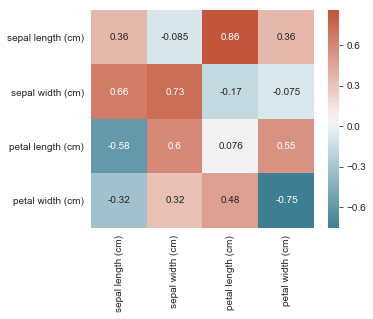

In [16]:
sb.heatmap(comps, cmap=sb.diverging_palette(220, 20, as_cmap=True), xticklabels=comps.columns.values, 
           yticklabels=comps.columns.values, annot=True)

### the first 2 principal components sepal length and sepal width contain over 97% of the set's total info and these are the ones we will keep
### component 1, sepal length is neg corr with sepal width
### these components are great to be used in machine learning has inputs to logistic regression to predict species labels

# Outlier Detection
## Preprocessing task for analysis for machine learning 
## An analythical method of its own merit

## Point outliers: observations anomalous with respect to the majority of observations in a feature (aka univariate outlier)

## contectual outliers: observations considered anomalous given a specific context 

## collective outliers: a collection of observations anomalous but appear close to one another because they all have a similar anomalous value

## Methods:
### Extreme value analysis with the Tukey method
### Multivariate analysis with boxplots and scatterplot matrices
### ML-DBSACN and PCA

## Univariate Method: Tukey Outlier Labeling 
### IQR (spread) distance between the 1st quartile and the 3rd quartile, if min value < than Q1-1.5(IQR) or max value > Q3 + 1.5(IQR) then the variable is suspected of being an outlier

In [ ]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import pylab as plt
import seaborn as sb
from IPython.display import Image
from IPython.core.display import HTML
from pylab import rcParams

import sklearn
from sklearn import decomposition
from sklearn.decomposition import PCA
from sklearn import datasets

%matplotlib inline
rcParams['figure.figsize'] = 5, 4
sb.set_style('whitegrid')

In [21]:
df = pd.read_csv(filepath_or_buffer = r"C:\Users\sousa\Desktop\github\DS- Extended Coding Tutorial [Searcheable]\iris.data.csv", header = None, 
                sep = ',' )
df.columns = ['Sepal Length','Sepal width', 'Petal Length', 'Petal Width', 'Species' ]
X = df.iloc[:,0:4].values
y = df.iloc[:,4].values

df[:5]

,Sepal Length,Sepal width,Petal Length,Petal Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


### Identifying outliers using Tukey boxplots

[]

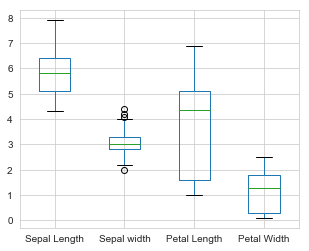

In [23]:
df.boxplot(return_type = 'dict')
plt.plot()

### the sepal width columns has values that are greater than 4 that seem good candidates to be outliers also, the values smaller than 2.05

In [25]:
#removing the outliers greater than 4
Sepal_width = X[:,1]
iris_outliers = (Sepal_width > 4)
df[iris_outliers]

,Sepal Length,Sepal width,Petal Length,Petal Width,Species
15,5.7,4.4,1.5,0.4,setosa
32,5.2,4.1,1.5,0.1,setosa
33,5.5,4.2,1.4,0.2,setosa


In [27]:
#removing the outliers smaller than 2.05
Sepal_width = X[:,1]
iris_outliers = (Sepal_width < 2.05)
df[iris_outliers]

,Sepal Length,Sepal width,Petal Length,Petal Width,Species
60,5.0,2.0,3.5,1.0,versicolor


### Tukey outlier labeling (univariate)

In [30]:
#now we know the row indexes of the outliers 
pd.options.display.float_format = '{:,.1f}'.format

X_df = pd.DataFrame(X)
print (X_df.describe())

          0     1     2     3
count 150.0 150.0 150.0 150.0
mean    5.8   3.1   3.8   1.2
std     0.8   0.4   1.8   0.8
min     4.3   2.0   1.0   0.1
25%     5.1   2.8   1.6   0.3
50%     5.8   3.0   4.3   1.3
75%     6.4   3.3   5.1   1.8
max     7.9   4.4   6.9   2.5


### in column with index 1 the min is 2.0, Q1 = 2.8, Q3 = 3.3 and max = 4.4 IQR = 3.3-2.8 = 0.5 so we multiply = IQR(1.5) = 0.75 
### since Q1-IQR(1.5) = 2.05 and the min value is less than this we can consider this an oultier

### for the calculations related to Q3: 2.8-0.75 = 2.05 and 3.3+0.75 = 4.05 which is smaller than the max so it can also confirm that this might be an outlier

# Multivariate Outlier detection 
## We use these methods to find outliers that only show up with combinations of observations from two or more different variables
## The methods are scartterplot matrices and boxplots

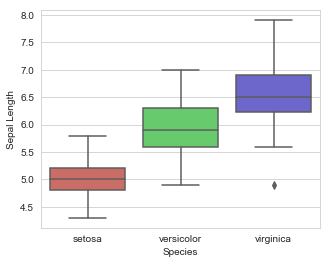

In [32]:
#visually inspecting boxplots
sb.boxplot(x = 'Species', y = 'Sepal Length', data = df, palette = 'hls')

### there is a very visual possible outlier in the virginica species

### let's check the scatterplot matrix

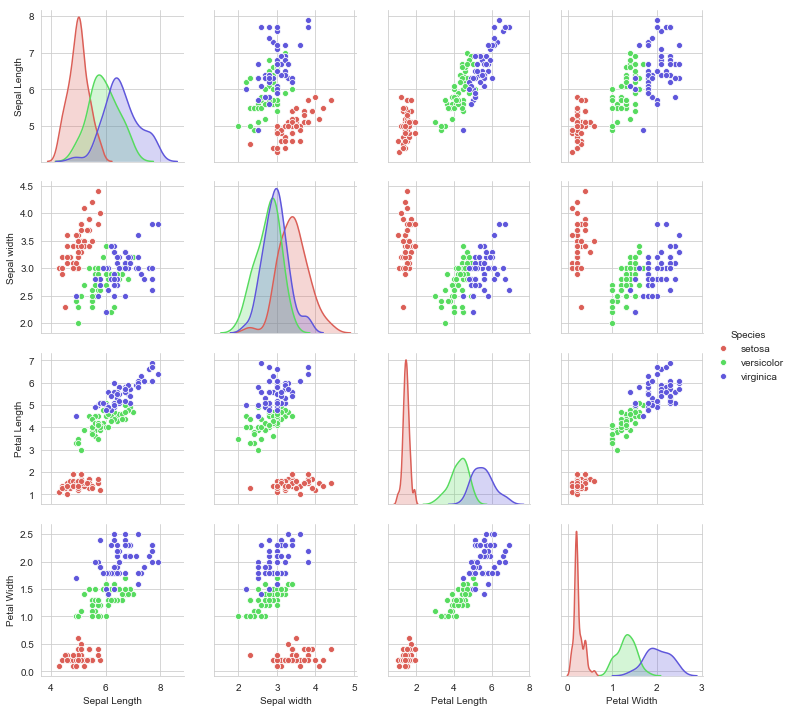

In [33]:
sb.pairplot(df, hue = 'Species', palette = 'hls')

### there is a clear red dot that seems to always fall out of the other clusters so that would be the outlier

# DBSCAN for outlier detection
## Unsupervised method that clusters core samples (dense areas of a dataset) and denotes non-core samples (sparse portions of a dataset)
## Use to indentify collective outliers
## Outliers should make up < 5% of the total observations-adjust model paramenters accordingly 

## Important DBSCAN model parameters
### eps the maximum distance between two samples for them to be clustered in the same neighborhood (start at eps = 0.1)
### min_samples: the minimum number of samples ina  neighborhood for a data point to qualify as a core point (start with very low sample size)

# DBSCan clustering to identify outliers

In [36]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import pylab as plt
import seaborn as sb
from IPython.display import Image
from IPython.core.display import HTML
from pylab import rcParams

import sklearn
from sklearn import decomposition
from sklearn.decomposition import PCA
from sklearn import datasets
from sklearn.cluster import DBSCAN
from collections import Counter

%matplotlib inline
rcParams['figure.figsize'] = 5, 4
sb.set_style('whitegrid')

## Training and identifying outliers


In [41]:
df = pd.read_csv(filepath_or_buffer = r"C:\Users\sousa\Desktop\github\DS- Extended Coding Tutorial [Searcheable]\iris.data.csv", header = None, 
                sep = ',' )
df.columns = ['Sepal Length','Sepal width', 'Petal Length', 'Petal Width', 'Species' ]
data = df.iloc[:,0:4].values
target = df.iloc[:,4].values

df[:5]

,Sepal Length,Sepal width,Petal Length,Petal Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [43]:
model = DBSCAN(eps = 0.8, min_samples = 19).fit(data)
print (model)

DBSCAN(algorithm='auto', eps=0.8, leaf_size=30, metric='euclidean',
    metric_params=None, min_samples=19, n_jobs=None, p=None)


In [46]:
#checking the appearance of outliers
outliers_df = pd.DataFrame(data)

print (Counter(model.labels_))

print (outliers_df[model.labels_ == -1])

Counter({1: 94, 0: 50, -1: 6})
      0   1   2   3
98  5.1 2.5 3.0 1.1
105 7.6 3.0 6.6 2.1
117 7.7 3.8 6.7 2.2
118 7.7 2.6 6.9 2.3
122 7.7 2.8 6.7 2.0
131 7.9 3.8 6.4 2.0


Text(0.5, 1.0, 'DBScan for Outlier Detection')

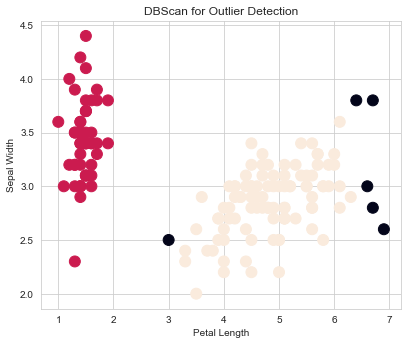

In [48]:
fig = plt.figure()
ax = fig.add_axes([.1,.1,1,1])

colors = model.labels_

ax.scatter(data[:,2],data[:,1], c = colors, s = 120)
ax.set_xlabel('Petal Length')
ax.set_ylabel('Sepal Width')
plt.title('D')
plt.title('DBScan for Outlier Detection')

### the records show how many labels have a counter of 1, how many labels have a counter of 0 and how many labels have a counter of -1 
### the -1 are considered outliers

### lets get a df that returns just the outliers

In [49]:
print (outliers_df[model.labels_ == -1])

      0   1   2   3
98  5.1 2.5 3.0 1.1
105 7.6 3.0 6.6 2.1
117 7.7 3.8 6.7 2.2
118 7.7 2.6 6.9 2.3
122 7.7 2.8 6.7 2.0
131 7.9 3.8 6.4 2.0


# K-means Clustering 
## K-means clsuetring algo is a simple unsupervides algorithm that's used for quickly predicting groupings from within an unlabeled dataset

## Predictions are based on:
### Number od clusters centers present (k)
### Nearest mean values (measured in Euclidian distance between observations)

## K-Means Use Cases
### Market price and cost modeling 
### customer segmentation
### insurance claim fraud detection
### hedge fund classification

## To keep in mind when using k-means
### scale the variables
### look at a scatterplot or the data table to estimate the number of centroids or cluster centers to set for the k parameter in the model

In [51]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import pylab as plt
import seaborn as sb
from IPython.display import Image
from IPython.core.display import HTML
from pylab import rcParams

import sklearn
from sklearn.cluster import KMeans
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import scale
from sklearn import datasets
import sklearn.metrics as sm
from sklearn.metrics import confusion_matrix, classification_report

%matplotlib inline
rcParams['figure.figsize'] = 5, 4
sb.set_style('whitegrid')


In [52]:
iris = datasets.load_iris()

X = scale(iris.data)
y = pd.DataFrame(iris.target)
variable_names = iris.feature_names
X[0:10, ]

array([[-0.90068117,  1.01900435, -1.34022653, -1.3154443 ],
       [-1.14301691, -0.13197948, -1.34022653, -1.3154443 ],
       [-1.38535265,  0.32841405, -1.39706395, -1.3154443 ],
       [-1.50652052,  0.09821729, -1.2833891 , -1.3154443 ],
       [-1.02184904,  1.24920112, -1.34022653, -1.3154443 ],
       [-0.53717756,  1.93979142, -1.16971425, -1.05217993],
       [-1.50652052,  0.78880759, -1.34022653, -1.18381211],
       [-1.02184904,  0.78880759, -1.2833891 , -1.3154443 ],
       [-1.74885626, -0.36217625, -1.34022653, -1.3154443 ],
       [-1.14301691,  0.09821729, -1.2833891 , -1.44707648]])

### Building and running the model

In [53]:
#since we know that the data set has 3 species we will be using 3 clusters 
#random_state initializes the clusters 
clustering  = KMeans(n_clusters = 3, random_state = 5)

clustering.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=5, tol=0.0001, verbose=0)

### Plotting the model ouput

In [54]:
iris_df = pd.DataFrame(iris.data)
iris_df.columns = ['Sepal_Length', 'Sepal_Width', 'Petal_Length', 'Petal_Width']

#setting up the columns for the targets
y.columns = ['Targets']

Text(0.5, 1.0, 'K-Means Classification')

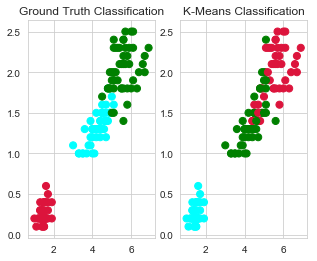

In [75]:
color_theme = np.array(['crimson', 'cyan', 'green'])

#passing 1 row, 2 columns and the third parameter for the position we want the next plot to appear
plt.subplot(1,2,1)

#for the scatter plot petal lenght will be plotted along the x axis and petal width along the y axis
plt.scatter(x = iris_df.Petal_Length,y = iris_df.Petal_Width, c = color_theme[iris.target], s = 50)

#the target variable is the label the contains the species label
plt.title('Ground Truth Classification')


#same thing but plotting the predictions instead of the actual values we just change the target variable
plt.subplot(1,2,2)

#for the scatter plot petal lenght will be plotted along the x axis and petal width along the y axis
plt.scatter(x = iris_df.Petal_Length,y = iris_df.Petal_Width, c = color_theme[clustering.labels_], s = 50 )

#the target variable is the label the contains the species label
plt.title('K-Means Classification')

### the clusters seem to have been predicted accurately but the clusters themselves are mislabeled 

Text(0.5, 1.0, 'K-Means Classification')

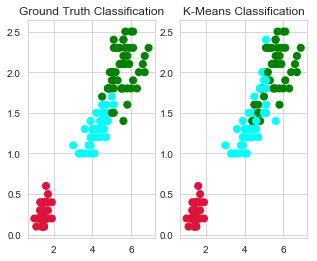

In [79]:
#we can use the numpy choose function to fix the mislabeling 
relabel = np.choose(clustering.labels_, [2,0,1]).astype(np.int64)


#passing 1 row, 2 columns and the third parameter for the position we want the next plot to appear
plt.subplot(1,2,1)

#for the scatter plot petal lenght will be plotted along the x axis and petal width along the y axis
plt.scatter(x = iris_df.Petal_Length,y = iris_df.Petal_Width, c = color_theme[iris.target], s = 50)

#the target variable is the label the contains the species label
plt.title('Ground Truth Classification')


#same thing but plotting the predictions instead of the actual values we just change the target variable
plt.subplot(1,2,2)

#for the scatter plot petal lenght will be plotted along the x axis and petal width along the y axis
plt.scatter(x = iris_df.Petal_Length,y = iris_df.Petal_Width, c = color_theme[relabel], s = 50 )

#the target variable is the label the contains the species label
plt.title('K-Means Classification')

### the k-means did a pretty good job, but we are still going to check quantitavely 

In [97]:
print (classification_report(y,relabel))

ValueError: Found input variables with inconsistent numbers of samples: [32, 150]

### precision is a measure of the models relevancy 
### recall is a measure of the model's completeness

### high precision+hig recall = highly accurate models

# Hierarchical clustering 
### predict subgroups within data by: 
#### finding the distance between each datapoint and its nearest neighbors
#### linking the most nearby neighbors

### We find the number of subgroups by looking at a dendogram
### a dendogram is a tree graph that is useful for visually displaying taxonomies, lineages and relatedness 

### for this method we need to tell the model how many centroids we need to use, for this we need to look at the dendogram after deciding how much we want the distance between neighbors to be we check how many times the dendogram intercepts the line we have decided for the distance and that is going to be the number of centoids we are going to use 


## Clustering parameters
### Distance metrics: euclidian, manhattan, cosine
### Linkage parameters: ward, complete, average
### we use trial and error to decide the selection



In [81]:
import numpy as np
import pandas as pd

import scipy
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.cluster.hierarchy import fcluster
from scipy.cluster.hierarchy import cophenet
from scipy.spatial.distance import pdist

import matplotlib.pyplot as plt
from pylab import rcParams
import seaborn as sb

import sklearn
from sklearn.cluster import AgglomerativeClustering
import sklearn.metrics as sm

np.set_printoptions(precision = 4, suppress =True)
plt.figure(figsize = (10,3))
%matplotlib inline
plt.style.use('seaborn-whitegrid')

In [83]:
address = r'C:\Users\sousa\Downloads\Python for Data Science Essential Training\Ex_Files_Python_Data_Science_EssT\Ex_Files_Python_Data_Science_EssT\Exercise Files\Ch01\01_05\mtcars.csv'
cars = pd.read_csv(address)

cars.columns = ['car_names','mpg','cyl','disp', 'hp', 'drat', 'wt', 'qsec', 'vs', 'am', 'gear', 'carb']
cars.index = cars.car_names

X = (cars.iloc[:,[1,3,4,6]].values)

y = (cars.iloc[:,9].values)

### Using scipy to generate dendograms

In [84]:
# z is going to be the clustering results that have been generating by the clustering algo
Z = linkage(X, 'ward')

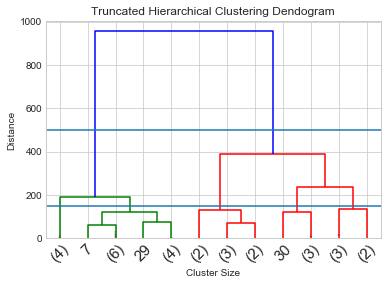

In [85]:
dendrogram(Z, truncate_mode='lastp', p=12, leaf_rotation=45., leaf_font_size=15., show_contracted=True)

plt.title('Truncated Hierarchical Clustering Dendogram')
plt.xlabel('Cluster Size')
plt.ylabel('Distance')

#creating distace lines
plt.axhline(y=500)
plt.axhline(y=150)
plt.show()


### Since we know that gears come as manual or auto we are going to pick 2 clusters for initial exploration, so the distance for neighbors will be greater than 400

## Generating hierarchical clusters

## testing Euclidean distance 

In [87]:
#variable to represent number of clusters
k =2

#affinity metric represents the distance as a measure of similarity
HClustering = AgglomerativeClustering(n_clusters = k, affinity = 'euclidean', linkage = 'ward')

HClustering.fit(X)

#scoring the model
sm.accuracy_score(y, HClustering.labels_)

0.78125

### Testing all the other possible distance metrics linkage to search for the best possible value

In [88]:
#affinity metric represents the distance as a measure of similarity
HClustering = AgglomerativeClustering(n_clusters = k, affinity = 'euclidean', linkage = 'complete')

HClustering.fit(X)

#scoring the model
sm.accuracy_score(y, HClustering.labels_)

0.4375

In [89]:
#affinity metric represents the distance as a measure of similarity
HClustering = AgglomerativeClustering(n_clusters = k, affinity = 'euclidean', linkage = 'average')

HClustering.fit(X)

#scoring the model
sm.accuracy_score(y, HClustering.labels_)

0.78125

In [90]:
#affinity metric represents the distance as a measure of similarity
HClustering = AgglomerativeClustering(n_clusters = k, affinity = 'manhattan', linkage = 'average')

HClustering.fit(X)

#scoring the model
sm.accuracy_score(y, HClustering.labels_)

0.71875

## Out of what was tested the best model was using euclidean distances with average linkage

# KNN - Classification
#### It is a supervised classifier that memorizes observations from within a labeled test set to predict classification labels for new, unlabeled observations
#### it makes predictions based on how similar training observations are to the new, incoming observations
#### the more similar the observation's values, the more likel they will be classified with the same label
#### the target attribute is a categorical variable

## Assumptions
### dataset has little noise
### dataset is labeled
### dataset only contains relevant features
### dataset has distinguishable subgroups

## Avoid using knn on large datasets, it will be quite slow
#### classification determines class label for unlabeled test case 

### can be used in email filtering, speech recognition, handwriting recognition, biometric identification

In [7]:
import numpy as np
import pandas as pd

import urllib

import matplotlib.pyplot as plt
from pylab import rcParams
import seaborn as sb

import sklearn
from sklearn.neighbors import KNeighborsClassifier
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn import metrics

np.set_printoptions(precision = 4, suppress =True)
plt.figure(figsize = (10,5))
%matplotlib inline
plt.style.use('seaborn-whitegrid')

## Splitting data set into test and training datasets

In [8]:
address = r'C:\Users\sousa\Downloads\Python for Data Science Essential Training\Ex_Files_Python_Data_Science_EssT\Ex_Files_Python_Data_Science_EssT\Exercise Files\Ch01\01_05\mtcars.csv'
cars = pd.read_csv(address)

cars.columns = ['car_names','mpg','cyl','disp', 'hp', 'drat', 'wt', 'qsec', 'vs', 'am', 'gear', 'carb']

## we will use the am variable as the target 
## the predictive features are going to be mpg, disp, hp and wt
## so predicting the time of transmission based off of these features

In [9]:
X_prime = (cars.iloc[:,[1,3,4,6]].values)

#target variable
y = (cars.iloc[:,9].values)

In [10]:
# scalling the variables

X = preprocessing.scale(X_prime)

In [11]:
# random_state is the seed for the data points selected for the different subgroups of train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .33, random_state = 17)

In [15]:
knn = KNeighborsClassifier()

clf = knn.fit(X_train, y_train)

print (clf)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')


## Evaluating model's predictions against the dataset

In [18]:
y_expect = y_test
y_pred = clf.predict(X_test)

#scoring the model
print(metrics.classification_report(y_expect, y_pred))

              precision    recall  f1-score   support

           0       0.71      1.00      0.83         5
           1       1.00      0.67      0.80         6

   micro avg       0.82      0.82      0.82        11
   macro avg       0.86      0.83      0.82        11
weighted avg       0.87      0.82      0.82        11



### for the 0.67 recall: high precision+ low recall = few results returned but many of the label predictions were correct
### recall is a measure of a model's completeness 
### of all the points labeled 1, only 67% of the results returned were trully relevant 
### for the entirety of the dataset 82% of the results were relevant 

## This model had high accuracy but low completion

# KNN II - classification
### K-Nearest Neighbors is an algorithm for supervised learning. Where the data is 'trained' with data points corresponding to their classification. Once a point is to be predicted, it takes into account the 'K' nearest points to it to determine it's classification.

###  telecommunications provider has segmented its customer base by service usage patterns, categorizing the customers into four groups. If demographic data can be used to predict group membership, the company can customize offers for individual prospective customers. It is a classification problem. That is, given the dataset, with predefined labels, we need to build a model to be used to predict class of a new or unknown case.

### The example focuses on using demographic data, such as region, age, and marital, to predict usage patterns.

### The target field, called custcat, has four possible values that correspond to the four customer groups, as follows: 1- Basic Service 2- E-Service 3- Plus Service 4- Total Service

### Our objective is to build a classifier, to predict the class of unknown cases. We will use a specific type of classification called K nearest neighbour.

In [1]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
import numpy as np
import matplotlib.ticker as ticker
from sklearn import preprocessing
%matplotlib inline

In [2]:
df = pd.read_csv(r"C:\Users\sousa\Desktop\github\Customer Segmentation Telecom Provider\teleCust1000t.csv")
df.head()


,region,tenure,age,marital,address,income,ed,employ,retire,gender,reside,custcat
0,2,13,44,1,9,64.0,4,5,0.0,0,2,1
1,3,11,33,1,7,136.0,5,5,0.0,0,6,4
2,3,68,52,1,24,116.0,1,29,0.0,1,2,3
3,2,33,33,0,12,33.0,2,0,0.0,1,1,1
4,2,23,30,1,9,30.0,1,2,0.0,0,4,3


#### how many of each class is in our data set

In [3]:
df['custcat'].value_counts()

3    281
1    266
4    236
2    217
Name: custcat, dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001A52B8636A0>]],
      dtype=object)

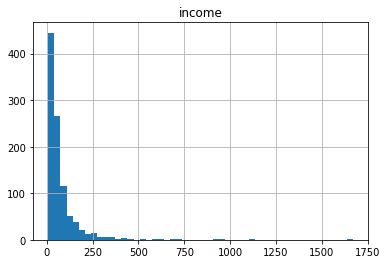

In [4]:
df.hist(column='income', bins=50)

### defining the feature set

In [5]:
df.columns

Index(['region', 'tenure', 'age', 'marital', 'address', 'income', 'ed',
       'employ', 'retire', 'gender', 'reside', 'custcat'],
      dtype='object')

#### To use scikit-learn library, we have to convert the Pandas data frame to a Numpy array:

In [6]:
X = df[['region', 'tenure','age', 'marital', 'address', 'income', 'ed', 'employ','retire', 'gender', 'reside']] .values  #.astype(float)
X[0:5]


array([[  2.,  13.,  44.,   1.,   9.,  64.,   4.,   5.,   0.,   0.,   2.],
       [  3.,  11.,  33.,   1.,   7., 136.,   5.,   5.,   0.,   0.,   6.],
       [  3.,  68.,  52.,   1.,  24., 116.,   1.,  29.,   0.,   1.,   2.],
       [  2.,  33.,  33.,   0.,  12.,  33.,   2.,   0.,   0.,   1.,   1.],
       [  2.,  23.,  30.,   1.,   9.,  30.,   1.,   2.,   0.,   0.,   4.]])

#### Labels

In [7]:
y = df['custcat'].values
y[0:5]

array([1, 4, 3, 1, 3], dtype=int64)

#### Normalizing the data
#### Data Standardization give data zero mean and unit variance, it is good practice, especially for algorithms such as KNN which is based on distance of cases:

In [8]:
X = preprocessing.StandardScaler().fit(X).transform(X.astype(float))
X[0:5]

array([[-0.02696767, -1.055125  ,  0.18450456,  1.0100505 , -0.25303431,
        -0.12650641,  1.0877526 , -0.5941226 , -0.22207644, -1.03459817,
        -0.23065004],
       [ 1.19883553, -1.14880563, -0.69181243,  1.0100505 , -0.4514148 ,
         0.54644972,  1.9062271 , -0.5941226 , -0.22207644, -1.03459817,
         2.55666158],
       [ 1.19883553,  1.52109247,  0.82182601,  1.0100505 ,  1.23481934,
         0.35951747, -1.36767088,  1.78752803, -0.22207644,  0.96655883,
        -0.23065004],
       [-0.02696767, -0.11831864, -0.69181243, -0.9900495 ,  0.04453642,
        -0.41625141, -0.54919639, -1.09029981, -0.22207644,  0.96655883,
        -0.92747794],
       [-0.02696767, -0.58672182, -0.93080797,  1.0100505 , -0.25303431,
        -0.44429125, -1.36767088, -0.89182893, -0.22207644, -1.03459817,
         1.16300577]])

### Train Test Split
#### Out of Sample Accuracy is the percentage of correct predictions that the model makes on data that that the model has NOT been trained on. Doing a train and test on the same dataset will most likely have low out-of-sample accuracy, due to the likelihood of being over-fit.

##### It is important that our models have a high, out-of-sample accuracy, because the purpose of any model, of course, is to make correct predictions on unknown data. So how can we improve out-of-sample accuracy? One way is to use an evaluation approach called Train/Test Split. Train/Test Split involves splitting the dataset into training and testing sets respectively, which are mutually exclusive. After which, you train with the training set and test with the testing set.

##### This will provide a more accurate evaluation on out-of-sample accuracy because the testing dataset is not part of the dataset that have been used to train the data. It is more realistic for real world problems.



In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (800, 11) (800,)
Test set: (200, 11) (200,)


## Classification

In [11]:
from sklearn.neighbors import KNeighborsClassifier

### Training

In [12]:
k = 4
#Train Model and Predict  
neigh = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
neigh

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=4, p=2,
                     weights='uniform')

#### predicting

In [13]:
yhat = neigh.predict(X_test)
yhat[0:5]

array([1, 1, 3, 2, 4], dtype=int64)

### Accuracy evaluation¶
### In multilabel classification, accuracy classification score is a function that computes subset accuracy. This function is equal to the jaccard_similarity_score function. Essentially, it calculates how closely the actual labels and predicted labels are matched in the test set.

In [14]:
from sklearn import metrics
print("Train set Accuracy: ", metrics.accuracy_score(y_train, neigh.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, yhat))

Train set Accuracy:  0.5475
Test set Accuracy:  0.32


### Now with k = 6

In [15]:
k = 6
neigh6 = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
yhat6 = neigh6.predict(X_test)
print("Train set Accuracy: ", metrics.accuracy_score(y_train, neigh6.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, yhat6))

Train set Accuracy:  0.51625
Test set Accuracy:  0.31


### testing several ks

In [16]:
Ks = 10
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
ConfustionMx = [];
for n in range(1,Ks):
    
    #Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    yhat=neigh.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)

    
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])

mean_acc

array([0.3  , 0.29 , 0.315, 0.32 , 0.315, 0.31 , 0.335, 0.325, 0.34 ])

## Plot ks to find best

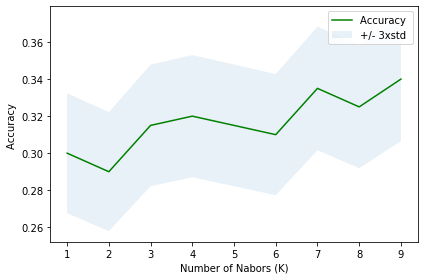

In [17]:
plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Nabors (K)')
plt.tight_layout()
plt.show()

In [18]:
print( "The best accuracy was with", mean_acc.max(), "with k=", mean_acc.argmax()+1) 

The best accuracy was with 0.34 with k= 9


# Decison trees - Classification 
### the basic intuition is to map out all possible decision paths in the form of a tree
### example wich drug to prescribe to a patient (age, cholesterol levels, gender, blood pressure all account for the decision tree-test an attribute and branch the cases
### each internal node is a test
### each breanch is the result of a test
### each leaf node assigns a patient to a class

### We construct a decision tree by considering the attributes one by one
### first we choose an attribute from the data set, calculate the significance of the attribute in the splitting of the data
### we then split the data based on the value of the best attribute and then go through each branch for the remaining attributes

### decision trees are built using recursive partitioning to classify the data 

#### predictiveness is based on the decrease in impurity of nodes
### the node of a tree is considered pure if in 100% of the cases the nodes fall into a specific category of the target field 

### recursion is used to split the training records into segments by minimizing impurity at each step

## Entropy: amount of information disorder or amount of randomness of the data 
### the lower the entropy the less uniform the distribution the purer the node

## a good tree is the tree that has the least entropy in their nodes
### we can calculate entropy through the formula or through the library packages 

## Information Gain: the tree with the higher information gain after splitting is the ideal, information gain is the information that can increase the level of certainty after splitting 

### it is the entropy of a tree before the split minus the weighted entropy after the split by an attribute 

### information gain and entropy are opposites 

In [19]:
import numpy as np 
import pandas as pd
from sklearn.tree import DecisionTreeClassifier

### About the dataset
Imagine that you are a medical researcher compiling data for a study. You have collected data about a set of patients, all of whom suffered from the same illness. During their course of treatment, each patient responded to one of 5 medications, Drug A, Drug B, Drug c, Drug x and y. 

Part of your job is to build a model to find out which drug might be appropriate for a future patient with the same illness. The feature sets of this dataset are Age, Sex, Blood Pressure, and Cholesterol of patients, and the target is the drug that each patient responded to. 

It is a sample of binary classifier, and you can use the training part of the dataset to build a decision tree, and then use it to predict the class of a unknown patient, or to prescribe it to a new patient.

In [20]:
my_data = pd.read_csv(r"C:\Users\sousa\drug200.csv", delimiter=",")
my_data[0:5]


,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY


### Pre-processing
Using my_data as the Drug.csv data read by pandas, declare the following variables: 

X as the Feature Matrix (data of my_data)
y as the response vector (target)
Remove the column containing the target name since it doesn't contain numeric values.

In [21]:
X = my_data[['Age', 'Sex', 'BP', 'Cholesterol', 'Na_to_K']].values
X[0:5]

array([[23, 'F', 'HIGH', 'HIGH', 25.355],
       [47, 'M', 'LOW', 'HIGH', 13.093],
       [47, 'M', 'LOW', 'HIGH', 10.113999999999999],
       [28, 'F', 'NORMAL', 'HIGH', 7.797999999999999],
       [61, 'F', 'LOW', 'HIGH', 18.043]], dtype=object)

### Convert categorical variable into dummy/indicator variables

In [22]:
from sklearn import preprocessing
le_sex = preprocessing.LabelEncoder()
le_sex.fit(['F','M'])
X[:,1] = le_sex.transform(X[:,1]) 


le_BP = preprocessing.LabelEncoder()
le_BP.fit([ 'LOW', 'NORMAL', 'HIGH'])
X[:,2] = le_BP.transform(X[:,2])


le_Chol = preprocessing.LabelEncoder()
le_Chol.fit([ 'NORMAL', 'HIGH'])
X[:,3] = le_Chol.transform(X[:,3]) 

X[0:5]


array([[23, 0, 0, 0, 25.355],
       [47, 1, 1, 0, 13.093],
       [47, 1, 1, 0, 10.113999999999999],
       [28, 0, 2, 0, 7.797999999999999],
       [61, 0, 1, 0, 18.043]], dtype=object)

### fill the target variable 

In [23]:
y = my_data["Drug"]
y[0:5]

0    drugY
1    drugC
2    drugC
3    drugX
4    drugY
Name: Drug, dtype: object

## Train test split
Now train_test_split will return 4 different parameters. We will name them:
X_trainset, X_testset, y_trainset, y_testset 

The train_test_split will need the parameters: 
X, y, test_size=0.3, and random_state=3. 

The X and y are the arrays required before the split, the test_size represents the ratio of the testing dataset, and the random_state ensures that we obtain the same splits.

In [24]:
from sklearn.model_selection import train_test_split
X_trainset, X_testset, y_trainset, y_testset = train_test_split(X, y, test_size=0.3, random_state=3)

In [25]:
X_testset.shape

(60, 5)

In [26]:
y_testset.shape

(60,)

### Create an instance of the DecisionTreeClassifier called drugTree.Inside of the classifier, specify criterion="entropy" so we can see the information gain of each node

In [27]:
drugTree = DecisionTreeClassifier(criterion="entropy", max_depth = 4)
drugTree # it shows the default parameters

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=4,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

#### fit the data with the training feature matrix X_trainset and training response vector y_trainset

In [28]:
drugTree.fit(X_trainset,y_trainset)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=4,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

### Predictions

In [30]:
predTree = drugTree.predict(X_testset)
print (predTree [0:5])
print (y_testset [0:5])

['drugY' 'drugX' 'drugX' 'drugX' 'drugX']
40     drugY
51     drugX
139    drugX
197    drugX
170    drugX
Name: Drug, dtype: object


### Evaluate

In [31]:
from sklearn import metrics
import matplotlib.pyplot as plt
print("DecisionTrees's Accuracy: ", metrics.accuracy_score(y_testset, predTree))

DecisionTrees's Accuracy:  0.9833333333333333


### Accuracy classification score computes subset accuracy: the set of labels predicted for a sample must exactly match the corresponding set of labels in y_true. In multilabel classification, the function returns the subset accuracy. If the entire set of predicted labels for a sample strictly match with the true set of labels, then the subset accuracy is 1.0; otherwise it is 0.0.

In [32]:
from sklearn.externals.six import StringIO
import pydotplus
import matplotlib.image as mpimg
from sklearn import tree
%matplotlib inline 

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\externals\six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


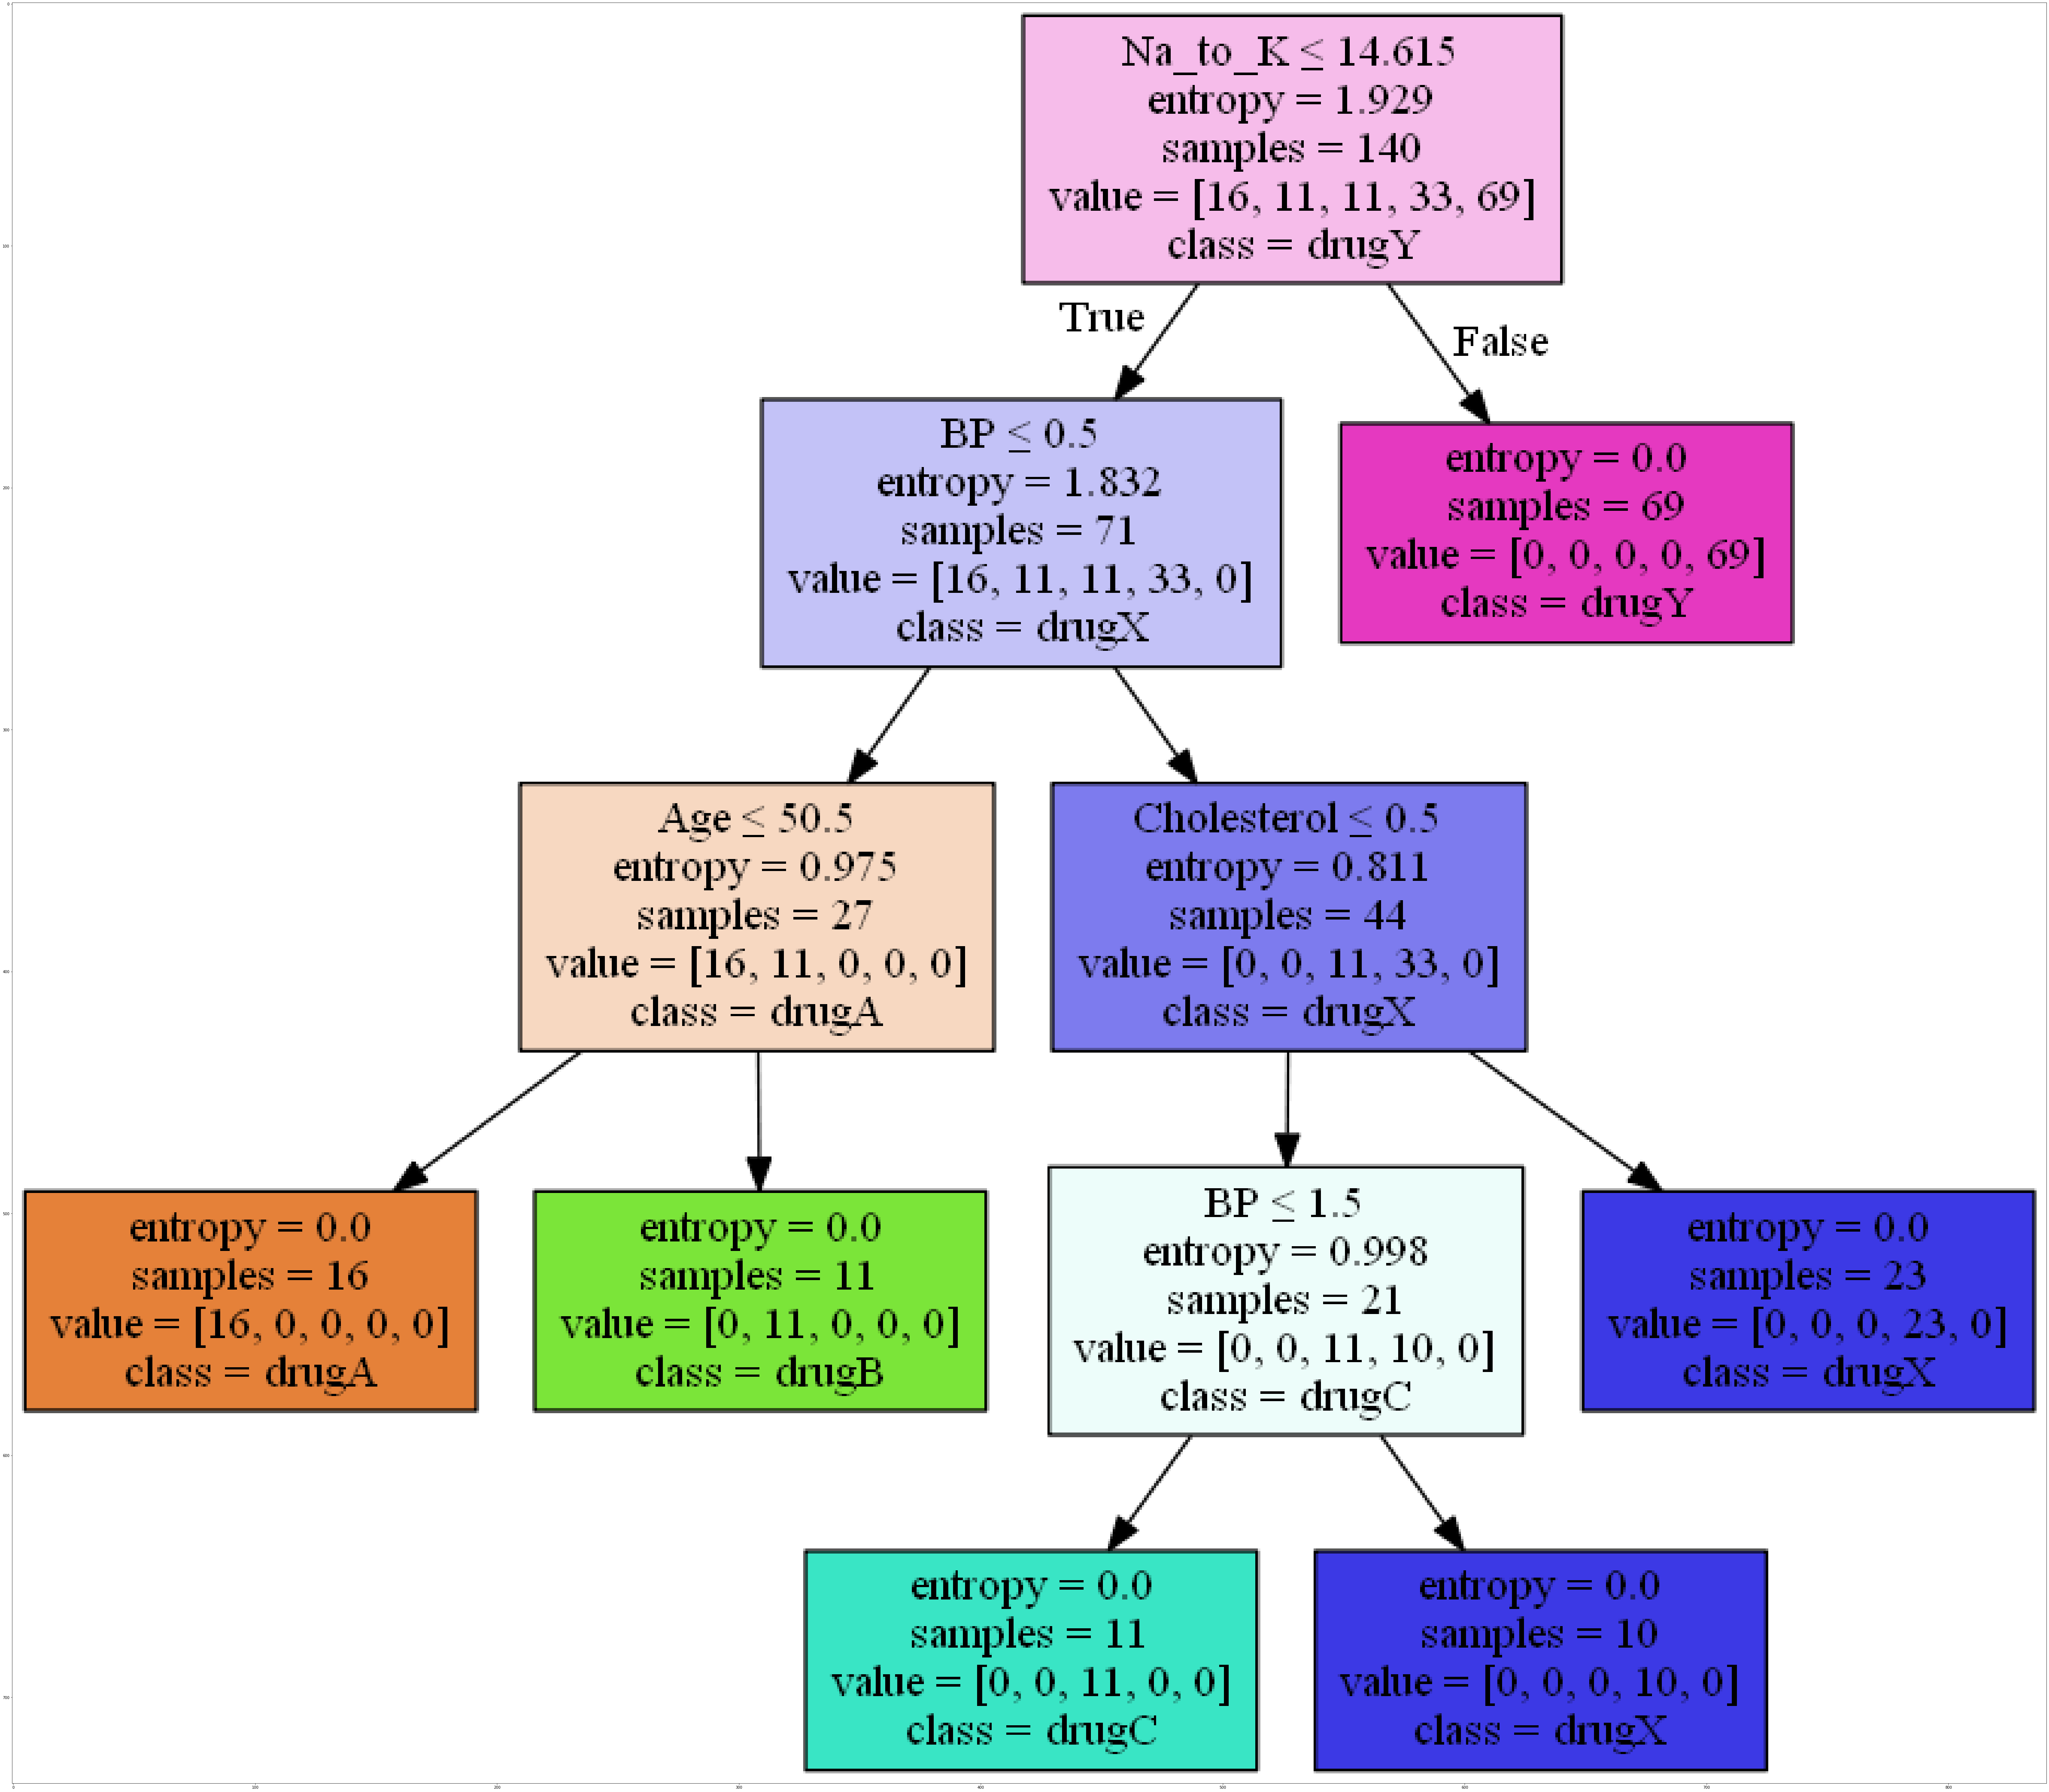

In [33]:
dot_data = StringIO()
filename = "drugtree.png"
featureNames = my_data.columns[0:5]
targetNames = my_data["Drug"].unique().tolist()
out=tree.export_graphviz(drugTree,feature_names=featureNames, out_file=dot_data, class_names= np.unique(y_trainset), filled=True,  special_characters=True,rotate=False)  
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png(filename)
img = mpimg.imread(filename)
plt.figure(figsize=(100, 200))
plt.imshow(img,interpolation='nearest')

# Logistic Regression- Classification
### classification algorithm for categorical variables
### example customer churn based on historical data 
### predictes categorical or discrete target instead of a numerical one (linear regression for example used continuous values), yes/no, success/no success type of answers
### we predict a class of a case and the probability of belonging to a particular class 

## when to use logistic regression:
### - target field in the data is categorical and binary (yes or no)
### - probability of for instance a customer buying a house
### - if data is linearly separable the decision line is a plane of a hyper plane
### - understanding the impact of a feature 

While Linear Regression is suited for estimating continuous values (e.g. estimating house price), it is not the best tool for predicting the class of an observed data point. In order to estimate the class of a data point, we need some sort of guidance on what would be the most probable class for that data point. For this, we use Logistic Regression

In [34]:
import pandas as pd
import pylab as pl
import numpy as np
import scipy.optimize as opt
from sklearn import preprocessing
%matplotlib inline 
import matplotlib.pyplot as plt

In [35]:
churn_df = pd.read_csv(r"C:\Users\sousa\Downloads\ChurnData.csv")
churn_df.head()

,tenure,age,address,income,ed,employ,equip,callcard,wireless,longmon,...,pager,internet,callwait,confer,ebill,loglong,logtoll,lninc,custcat,churn
0,11.0,33.0,7.0,136.0,5.0,5.0,0.0,1.0,1.0,4.40,...,1.0,0.0,1.0,1.0,0.0,1.482,3.033,4.913,4.0,1.0
1,33.0,33.0,12.0,33.0,2.0,0.0,0.0,0.0,0.0,9.45,...,0.0,0.0,0.0,0.0,0.0,2.246,3.240,3.497,1.0,1.0
2,23.0,30.0,9.0,30.0,1.0,2.0,0.0,0.0,0.0,6.30,...,0.0,0.0,0.0,1.0,0.0,1.841,3.240,3.401,3.0,0.0
3,38.0,35.0,5.0,76.0,2.0,10.0,1.0,1.0,1.0,6.05,...,1.0,1.0,1.0,1.0,1.0,1.800,3.807,4.331,4.0,0.0
4,7.0,35.0,14.0,80.0,2.0,15.0,0.0,1.0,0.0,7.10,...,0.0,0.0,1.0,1.0,0.0,1.960,3.091,4.382,3.0,0.0


## Data pre-processing and selection
### Lets select some features for the modeling. Also we change the target data type to be integer, as it is a requirement by the skitlearn algorithm

In [36]:
churn_df = churn_df[['tenure', 'age', 'address', 'income', 'ed', 'employ', 'equip',   'callcard', 'wireless','churn']]
churn_df['churn'] = churn_df['churn'].astype('int')
churn_df.head()

,tenure,age,address,income,ed,employ,equip,callcard,wireless,churn
0,11.0,33.0,7.0,136.0,5.0,5.0,0.0,1.0,1.0,1
1,33.0,33.0,12.0,33.0,2.0,0.0,0.0,0.0,0.0,1
2,23.0,30.0,9.0,30.0,1.0,2.0,0.0,0.0,0.0,0
3,38.0,35.0,5.0,76.0,2.0,10.0,1.0,1.0,1.0,0
4,7.0,35.0,14.0,80.0,2.0,15.0,0.0,1.0,0.0,0


In [37]:
churn_df.shape

(200, 10)

In [38]:
X = np.asarray(churn_df[['tenure', 'age', 'address', 'income', 'ed', 'employ', 'equip']])
X[0:5]

array([[ 11.,  33.,   7., 136.,   5.,   5.,   0.],
       [ 33.,  33.,  12.,  33.,   2.,   0.,   0.],
       [ 23.,  30.,   9.,  30.,   1.,   2.,   0.],
       [ 38.,  35.,   5.,  76.,   2.,  10.,   1.],
       [  7.,  35.,  14.,  80.,   2.,  15.,   0.]])

In [39]:
y = np.asarray(churn_df['churn'])
y [0:5]

array([1, 1, 0, 0, 0])

### Normalizing the data set

In [40]:
from sklearn import preprocessing
X = preprocessing.StandardScaler().fit(X).transform(X)
X[0:5]

array([[-1.13518441, -0.62595491, -0.4588971 ,  0.4751423 ,  1.6961288 ,
        -0.58477841, -0.85972695],
       [-0.11604313, -0.62595491,  0.03454064, -0.32886061, -0.6433592 ,
        -1.14437497, -0.85972695],
       [-0.57928917, -0.85594447, -0.261522  , -0.35227817, -1.42318853,
        -0.92053635, -0.85972695],
       [ 0.11557989, -0.47262854, -0.65627219,  0.00679109, -0.6433592 ,
        -0.02518185,  1.16316   ],
       [-1.32048283, -0.47262854,  0.23191574,  0.03801451, -0.6433592 ,
         0.53441472, -0.85972695]])

### train/test

In [41]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (160, 7) (160,)
Test set: (40, 7) (40,)


### Fitting the data 
#### Regularization is a technique used to solve the overfitting problem in machine learning models. C parameter indicates inverse of regularization strength which must be a positive float. Smaller values specify stronger regularization.

In [42]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
LR = LogisticRegression(C=0.01, solver='liblinear').fit(X_train,y_train)
LR

LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

### predic using test set

In [43]:
yhat = LR.predict(X_test)
yhat

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0])

### predict_proba returns estimates for all classes, ordered by the label of classes

In [44]:
yhat_prob = LR.predict_proba(X_test)
yhat_prob

array([[0.54132919, 0.45867081],
       [0.60593357, 0.39406643],
       [0.56277713, 0.43722287],
       [0.63432489, 0.36567511],
       [0.56431839, 0.43568161],
       [0.55386646, 0.44613354],
       [0.52237207, 0.47762793],
       [0.60514349, 0.39485651],
       [0.41069572, 0.58930428],
       [0.6333873 , 0.3666127 ],
       [0.58068791, 0.41931209],
       [0.62768628, 0.37231372],
       [0.47559883, 0.52440117],
       [0.4267593 , 0.5732407 ],
       [0.66172417, 0.33827583],
       [0.55092315, 0.44907685],
       [0.51749946, 0.48250054],
       [0.485743  , 0.514257  ],
       [0.49011451, 0.50988549],
       [0.52423349, 0.47576651],
       [0.61619519, 0.38380481],
       [0.52696302, 0.47303698],
       [0.63957168, 0.36042832],
       [0.52205164, 0.47794836],
       [0.50572852, 0.49427148],
       [0.70706202, 0.29293798],
       [0.55266286, 0.44733714],
       [0.52271594, 0.47728406],
       [0.51638863, 0.48361137],
       [0.71331391, 0.28668609],
       [0.

### Evaluation

#### jaccard index
#### Lets try jaccard index for accuracy evaluation. we can define jaccard as the size of the intersection divided by the size of the union of two label sets. If the entire set of predicted labels for a sample strictly match with the true set of labels, then the subset accuracy is 1.0; otherwise it is 0.0.

In [45]:
from sklearn.metrics import jaccard_similarity_score
jaccard_similarity_score(y_test, yhat)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:635: DeprecationWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  'and multiclass classification tasks.', DeprecationWarning)


0.75

### Confusion matrix

In [46]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
print(confusion_matrix(y_test, yhat, labels=[1,0]))

[[ 6  9]
 [ 1 24]]


Confusion matrix, without normalization
[[ 6  9]
 [ 1 24]]


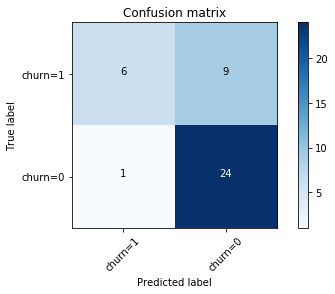

In [47]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, yhat, labels=[1,0])
np.set_printoptions(precision=2)


# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['churn=1','churn=0'],normalize= False,  title='Confusion matrix')

The first row is for customers whose actual churn value in test set is 1. As you can calculate, out of 40 customers, the churn value of 15 of them is 1. And out of these 15, the classifier correctly predicted 6 of them as 1, and 9 of them as 0.

It means, for 6 customers, the actual churn value were 1 in test set, and classifier also correctly predicted those as 1. However, while the actual label of 9 customers were 1, the classifier predicted those as 0, which is not very good. We can consider it as error of the model for first row.

What about the customers with churn value 0? Lets look at the second row. It looks like there were 25 customers whom their churn value were 0.

The classifier correctly predicted 24 of them as 0, and one of them wrongly as 1. So, it has done a good job in predicting the customers with churn value 0. A good thing about confusion matrix is that shows the model’s ability to correctly predict or separate the classes. In specific case of binary classifier, such as this example, we can interpret these numbers as the count of true positives, false positives, true negatives, and false negatives.

In [48]:
print (classification_report(y_test, yhat))


              precision    recall  f1-score   support

           0       0.73      0.96      0.83        25
           1       0.86      0.40      0.55        15

    accuracy                           0.75        40
   macro avg       0.79      0.68      0.69        40
weighted avg       0.78      0.75      0.72        40



### recision is a measure of the accuracy provided that a class label has been predicted. It is defined by: precision = TP / (TP + FP)

### Recall is true positive rate. It is defined as: Recall = TP / (TP + FN)

## Log-Loss

In [49]:
from sklearn.metrics import log_loss
log_loss(y_test, yhat_prob)

0.6017092478101187

In [50]:
LR2 = LogisticRegression(C=0.01, solver='sag').fit(X_train,y_train)
yhat_prob2 = LR2.predict_proba(X_test)
print ("LogLoss: : %.2f" % log_loss(y_test, yhat_prob2))

LogLoss: : 0.61


# Support Vector Machines - Classification

### SVM works by mapping data to a high-dimensional feature space so that data points can be categorized, even when the data are not otherwise linearly separable. A separator between the categories is found, then the data is transformed in such a way that the separator could be drawn as a hyperplane. Following this, characteristics of new data can be used to predict the group to which a new record should belong.

### looks for patterns within the data 

### SVm is a supervised algorithm thta can classify cases by finding a separator, first it maps data to a high dimensional feature space so the data points can be categorized then a separator is estimated for the data

In [51]:
import pandas as pd
import pylab as pl
import numpy as np
import scipy.optimize as opt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
%matplotlib inline 
import matplotlib.pyplot as plt

### The example is based on a dataset that is publicly available from the UCI Machine Learning Repository (Asuncion and Newman, 2007)[http://mlearn.ics.uci.edu/MLRepository.html]. The dataset consists of several hundred human cell sample records, each of which contains the values of a set of cell characteristics. 

In [52]:
cell_df = pd.read_csv(r"C:\Users\sousa\Desktop\github\DS- Extended Coding Tutorial [Searcheable]\cell_samples.csv")
cell_df.head()

,ID,Clump,UnifSize,UnifShape,MargAdh,SingEpiSize,BareNuc,BlandChrom,NormNucl,Mit,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


### The ID field contains the patient identifiers. The characteristics of the cell samples from each patient are contained in fields Clump to Mit. The values are graded from 1 to 10, with 1 being the closest to benign.

### The Class field contains the diagnosis, as confirmed by separate medical procedures, as to whether the samples are benign (value = 2) or malignant (value = 4).

## distribution of the classes based on Clump thickness and Uniformity of cell size

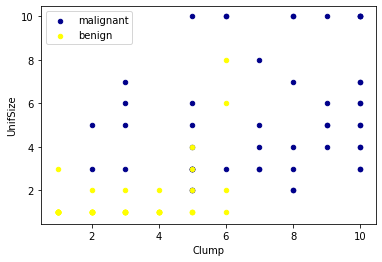

In [53]:
ax = cell_df[cell_df['Class'] == 4][0:50].plot(kind='scatter', x='Clump', y='UnifSize', color='DarkBlue', label='malignant');
cell_df[cell_df['Class'] == 2][0:50].plot(kind='scatter', x='Clump', y='UnifSize', color='Yellow', label='benign', ax=ax);
plt.show()

### here two categories were predicted but they are separated by a curve, not a line 
### it is a linearly not separable dataset which is the case for most real-world problems

### Pre-processing and selection

In [54]:
cell_df.dtypes

ID              int64
Clump           int64
UnifSize        int64
UnifShape       int64
MargAdh         int64
SingEpiSize     int64
BareNuc        object
BlandChrom      int64
NormNucl        int64
Mit             int64
Class           int64
dtype: object

### BareNuc column includes some values that are not numerical. We can drop those rows

In [55]:
cell_df = cell_df[pd.to_numeric(cell_df['BareNuc'], errors='coerce').notnull()]
cell_df['BareNuc'] = cell_df['BareNuc'].astype('int')
cell_df.dtypes

ID             int64
Clump          int64
UnifSize       int64
UnifShape      int64
MargAdh        int64
SingEpiSize    int64
BareNuc        int32
BlandChrom     int64
NormNucl       int64
Mit            int64
Class          int64
dtype: object

In [56]:
feature_df = cell_df[['Clump', 'UnifSize', 'UnifShape', 'MargAdh', 'SingEpiSize', 'BareNuc', 'BlandChrom', 'NormNucl', 'Mit']]
X = np.asarray(feature_df)
X[0:5]

array([[ 5,  1,  1,  1,  2,  1,  3,  1,  1],
       [ 5,  4,  4,  5,  7, 10,  3,  2,  1],
       [ 3,  1,  1,  1,  2,  2,  3,  1,  1],
       [ 6,  8,  8,  1,  3,  4,  3,  7,  1],
       [ 4,  1,  1,  3,  2,  1,  3,  1,  1]], dtype=int64)

In [57]:
cell_df['Class'] = cell_df['Class'].astype('int')
y = np.asarray(cell_df['Class'])
y [0:5]

array([2, 2, 2, 2, 2])

## train/test

In [58]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (546, 9) (546,)
Test set: (137, 9) (137,)


### The SVM algorithm offers a choice of kernel functions for performing its processing. Basically, mapping data into a higher dimensional space is called kernelling. The mathematical function used for the transformation is known as the kernel function, and can be of different types, such as:

1.Linear
2.Polynomial
3.Radial basis function (RBF)
4.Sigmoid
Each of these functions has its characteristics, its pros and cons, and its equation, but as there's no easy way of knowing which function performs best with any given dataset, we usually choose different functions in turn and compare the results. Let's just use the default, RBF (Radial Basis Function)

In [59]:
from sklearn import svm
clf = svm.SVC(kernel='rbf')
clf.fit(X_train, y_train) 

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

## Predict

In [60]:
yhat = clf.predict(X_test)
yhat [0:5]

array([2, 4, 2, 4, 2])

## Evaluation

In [61]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools

In [62]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

              precision    recall  f1-score   support

           2       1.00      0.94      0.97        90
           4       0.90      1.00      0.95        47

    accuracy                           0.96       137
   macro avg       0.95      0.97      0.96       137
weighted avg       0.97      0.96      0.96       137

Confusion matrix, without normalization
[[85  5]
 [ 0 47]]


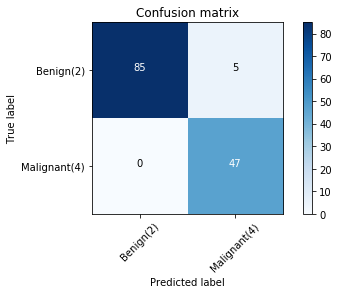

In [63]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, yhat, labels=[2,4])
np.set_printoptions(precision=2)

print (classification_report(y_test, yhat))

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Benign(2)','Malignant(4)'],normalize= False,  title='Confusion matrix')

## F1 score

In [64]:
from sklearn.metrics import f1_score
f1_score(y_test, yhat, average='weighted') 

0.9639038982104676

## Lets try jaccard index for accuracy

In [65]:
from sklearn.metrics import jaccard_similarity_score
jaccard_similarity_score(y_test, yhat)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:635: DeprecationWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  'and multiclass classification tasks.', DeprecationWarning)


0.9635036496350365

## Now with linear kernel

In [66]:
clf2 = svm.SVC(kernel='linear')
clf2.fit(X_train, y_train) 
yhat2 = clf2.predict(X_test)
print("Avg F1-score: %.4f" % f1_score(y_test, yhat2, average='weighted'))
print("Jaccard score: %.4f" % jaccard_similarity_score(y_test, yhat2))

Avg F1-score: 0.9639
Jaccard score: 0.9635


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:635: DeprecationWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  'and multiclass classification tasks.', DeprecationWarning)


# Clustering vs Classification

### clustering is one of the most common methods for customer segmentation clustering can group data that is unsupervised based on customer similarity

#### classification algos predict categorical class labels which means assigning instances to pre-defined classes like "defaulted"or non "defaulted" , in clustering the data is unlabeled and the process is unsupervised 

# K-Means - Clustering
### goups unsupervised data based on similarity of customers to each other 
### it is a type of partitioning clustering, it divides the data into k non-overlapping subsets (or clusters) without any cluster-internal structure or labels-it is an unsupervised algorithm

### dissimilar samples fall into different clusters so we can use dissimilarity metrics
### for example if we have a data set with two features, age and income we are working with a two dimentional space 

### K-means randomly picls a center point for each cluster, which means we need to initialize k (number of clusters)

### each of the picked ks are called centroids 

### the approach to choose the centroids is:
#### -randomly choose 3 observations out of the data set and use those observations
#### -create 3 random points as centroids of the clusters 

### we then calsulate the distances using a distance matrix between centroids

### once we find the closest data points to the centroids we assign each data point to that cluster 



In [71]:
import random 
from sklearn import datasets
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn.cluster import KMeans 
from sklearn.datasets.samples_generator import make_blobs 
%matplotlib inline

In [72]:
iris = datasets.load_iris()

In [73]:
X = iris.data[:, :2]
y = iris.target

### Looking at a scatter plot

Text(0, 0.5, 'Sepal Width')

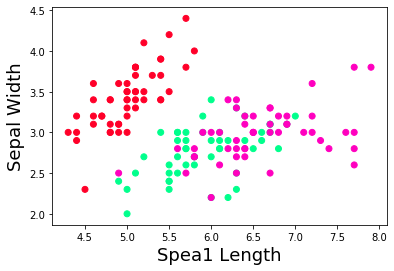

In [74]:
plt.scatter(X[:,0], X[:,1], c=y, cmap='gist_rainbow')
plt.xlabel('Spea1 Length', fontsize=18)
plt.ylabel('Sepal Width', fontsize=18)

## Setting up k-means

init: Initialization method of the centroids.
Value will be: "k-means++"
k-means++: Selects initial cluster centers for k-mean clustering in a smart way to speed up convergence.
n_clusters: The number of clusters to form as well as the number of centroids to generate.
Value will be: 3 (since we have 3 centers)
n_init: Number of time the k-means algorithm will be run with different centroid seeds. The final results will be the best output of n_init consecutive runs in terms of inertia.
Value will be: 12
Initialize KMeans with these parameters, where the output parameter is called k_means

In [76]:
k_means = KMeans(n_clusters = 3, n_jobs = 4, random_state=21)
k_means.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=4, precompute_distances='auto',
       random_state=21, tol=0.0001, verbose=0)

### getting the labels

In [77]:
k_means_labels = k_means.labels_
k_means_labels

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 0, 2, 0, 2, 0, 2, 0, 0, 0, 0, 0, 0, 2,
       0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0])

### getting the cluster centers

In [78]:
k_means_cluster_centers = k_means.cluster_centers_
k_means_cluster_centers

array([[5.77, 2.69],
       [5.01, 3.43],
       [6.81, 3.07]])

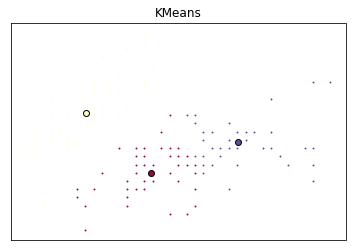

In [79]:
# Initialize the plot with the specified dimensions.
fig = plt.figure(figsize=(6, 4))

# Colors uses a color map, which will produce an array of colors based on
# the number of labels there are. We use set(k_means_labels) to get the
# unique labels.
colors = plt.cm.Spectral(np.linspace(0, 1, len(set(k_means_labels))))

# Create a plot
ax = fig.add_subplot(1, 1, 1)

# For loop that plots the data points and centroids.
# k will range from 0-3, which will match the possible clusters that each
# data point is in.
for k, col in zip(range(len([[4,4], [-2, -1], [2, -3], [1, 1]])), colors):

    # Create a list of all data points, where the data poitns that are 
    # in the cluster (ex. cluster 0) are labeled as true, else they are
    # labeled as false.
    my_members = (k_means_labels == k)
    
    # Define the centroid, or cluster center.
    cluster_center = k_means_cluster_centers[k]
    
    # Plots the datapoints with color col.
    ax.plot(X[my_members, 0], X[my_members, 1], 'w', markerfacecolor=col, marker='.')
    
    # Plots the centroids with specified color, but with a darker outline
    ax.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor=col,  markeredgecolor='k', markersize=6)

# Title of the plot
ax.set_title('KMeans')

# Remove x-axis ticks
ax.set_xticks(())

# Remove y-axis ticks
ax.set_yticks(())

# Show the plot
plt.show()


# K-Means for customer segmentation

In [80]:
import pandas as pd
cust_df = pd.read_csv(r"C:\Users\sousa\Downloads\Cust_Segmentation.csv")
cust_df.head()

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,Address,DebtIncomeRatio
0,1,41,2,6,19,0.124,1.073,0.0,NBA001,6.3
1,2,47,1,26,100,4.582,8.218,0.0,NBA021,12.8
2,3,33,2,10,57,6.111,5.802,1.0,NBA013,20.9
3,4,29,2,4,19,0.681,0.516,0.0,NBA009,6.3
4,5,47,1,31,253,9.308,8.908,0.0,NBA008,7.2


### Pre-processing
As you can see, Address in this dataset is a categorical variable. k-means algorithm isn't directly applicable to categorical variables because Euclidean distance function isn't really meaningful for discrete variables. So, lets drop this feature and run clustering

In [81]:
df = cust_df.drop('Address', axis=1)
df.head()

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
0,1,41,2,6,19,0.124,1.073,0.0,6.3
1,2,47,1,26,100,4.582,8.218,0.0,12.8
2,3,33,2,10,57,6.111,5.802,1.0,20.9
3,4,29,2,4,19,0.681,0.516,0.0,6.3
4,5,47,1,31,253,9.308,8.908,0.0,7.2


## Normalizing over the standard deviation
Now let's normalize the dataset. But why do we need normalization in the first place? Normalization is a statistical method that helps mathematical-based algorithms to interpret features with different magnitudes and distributions equally. We use StandardScaler() to normalize our dataset.

In [82]:
from sklearn.preprocessing import StandardScaler
X = df.values[:,1:]
X = np.nan_to_num(X)
Clus_dataSet = StandardScaler().fit_transform(X)
Clus_dataSet

array([[ 0.74,  0.31, -0.38, ..., -0.59, -0.52, -0.58],
       [ 1.49, -0.77,  2.57, ...,  1.51, -0.52,  0.39],
       [-0.25,  0.31,  0.21, ...,  0.8 ,  1.91,  1.6 ],
       ...,
       [-1.25,  2.47, -1.26, ...,  0.04,  1.91,  3.46],
       [-0.38, -0.77,  0.51, ..., -0.7 , -0.52, -1.08],
       [ 2.11, -0.77,  1.1 , ...,  0.16, -0.52, -0.23]])

## Modeling

In [83]:
clusterNum = 3
k_means = KMeans(init = "k-means++", n_clusters = clusterNum, n_init = 12)
k_means.fit(X)
labels = k_means.labels_
print(labels)

[1 0 1 1 2 0 1 0 1 0 0 1 1 1 1 1 1 1 0 1 1 1 1 0 0 0 1 1 0 1 0 1 1 1 1 1 1
 1 1 0 1 0 1 2 1 0 1 1 1 0 0 1 1 0 0 1 1 1 0 1 0 1 0 0 1 1 0 1 1 1 0 0 0 1
 1 1 1 1 0 1 0 0 2 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 0 1
 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1 1 1 1 0 1 0 1
 1 1 1 1 1 1 0 1 0 0 1 0 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 0 1 1 1 0 1
 1 1 1 1 0 1 1 0 1 0 1 1 0 2 1 0 1 1 1 1 1 1 2 0 1 1 1 1 0 1 1 0 0 1 0 1 0
 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 2 0 1 1 1 1 1 1 1 0 1 1 1 1
 1 1 0 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 0 1 0 1 0 0 1 1 1 1 1 1
 1 1 1 0 0 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 0 1 0 0 1
 1 1 1 1 0 1 1 1 1 1 1 0 1 1 0 1 1 0 1 1 1 1 1 0 1 1 1 2 1 1 1 0 1 0 0 0 1
 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1
 1 0 1 1 0 1 1 1 1 0 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 1 1 1 2
 1 1 1 1 1 1 0 1 1 1 2 1 1 1 1 0 1 2 1 1 1 1 0 1 0 0 0 1 1 0 0 1 1 1 1 1 1
 1 0 1 1 1 1 0 1 1 1 0 1 

### Labels for each row of the data set

In [84]:
df["Clus_km"] = labels
df.head(5)

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio,Clus_km
0,1,41,2,6,19,0.124,1.073,0.0,6.3,1
1,2,47,1,26,100,4.582,8.218,0.0,12.8,0
2,3,33,2,10,57,6.111,5.802,1.0,20.9,1
3,4,29,2,4,19,0.681,0.516,0.0,6.3,1
4,5,47,1,31,253,9.308,8.908,0.0,7.2,2


## check the centroid values by averaging the features in each cluster

In [85]:
df.groupby('Clus_km').mean()

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
Clus_km,,,,,,,,,
0,402.295082,41.333333,1.956284,15.256831,83.928962,3.103639,5.765279,0.171233,10.724590
1,432.468413,32.964561,1.614792,6.374422,31.164869,1.032541,2.104133,0.285185,10.094761
2,410.166667,45.388889,2.666667,19.555556,227.166667,5.678444,10.907167,0.285714,7.322222


## Visualize customer distribution based on age and income

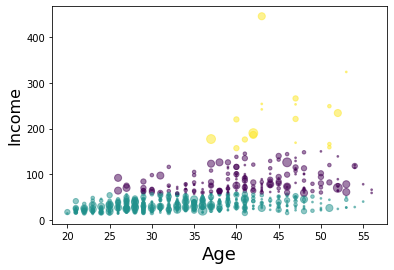

In [86]:
area = np.pi * ( X[:, 1])**2  
plt.scatter(X[:, 0], X[:, 3], s=area, c=labels.astype(np.float), alpha=0.5)
plt.xlabel('Age', fontsize=18)
plt.ylabel('Income', fontsize=16)

plt.show()